<a href="https://colab.research.google.com/github/PL-V/Housing-Orange/blob/main/Housing_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
df_train = pd.read_csv('https://raw.githubusercontent.com/PL-V/Housing-Orange/main/train.csv')

In [8]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_train.describe(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [10]:
pd.DataFrame(df_train.isnull().sum()/len(df_train),columns=['ratio']).query('ratio>0').sort_values(by='ratio')


,ratio
Electrical,0.000685
MasVnrType,0.005479
MasVnrArea,0.005479
BsmtQual,0.025342
BsmtCond,0.025342
BsmtFinType1,0.025342
BsmtExposure,0.026027
BsmtFinType2,0.026027
GarageCond,0.055479
GarageQual,0.055479


In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
#for col in df_train.columns:
  #if df[col].dtype != 'object':


df_train.columns 


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [73]:
df_train['RoofStyle'].value_counts()

6

In [75]:
df_train['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [49]:
df_train['RoofStyle'].isnull().sum()

0

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

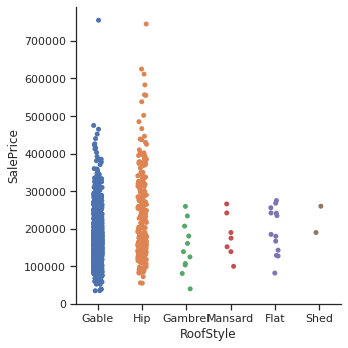

In [52]:
tips = sns.load_dataset("tips")
sns.catplot(x="RoofStyle", y="SalePrice", data=df_train)

In [54]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<function matplotlib.pyplot.show>

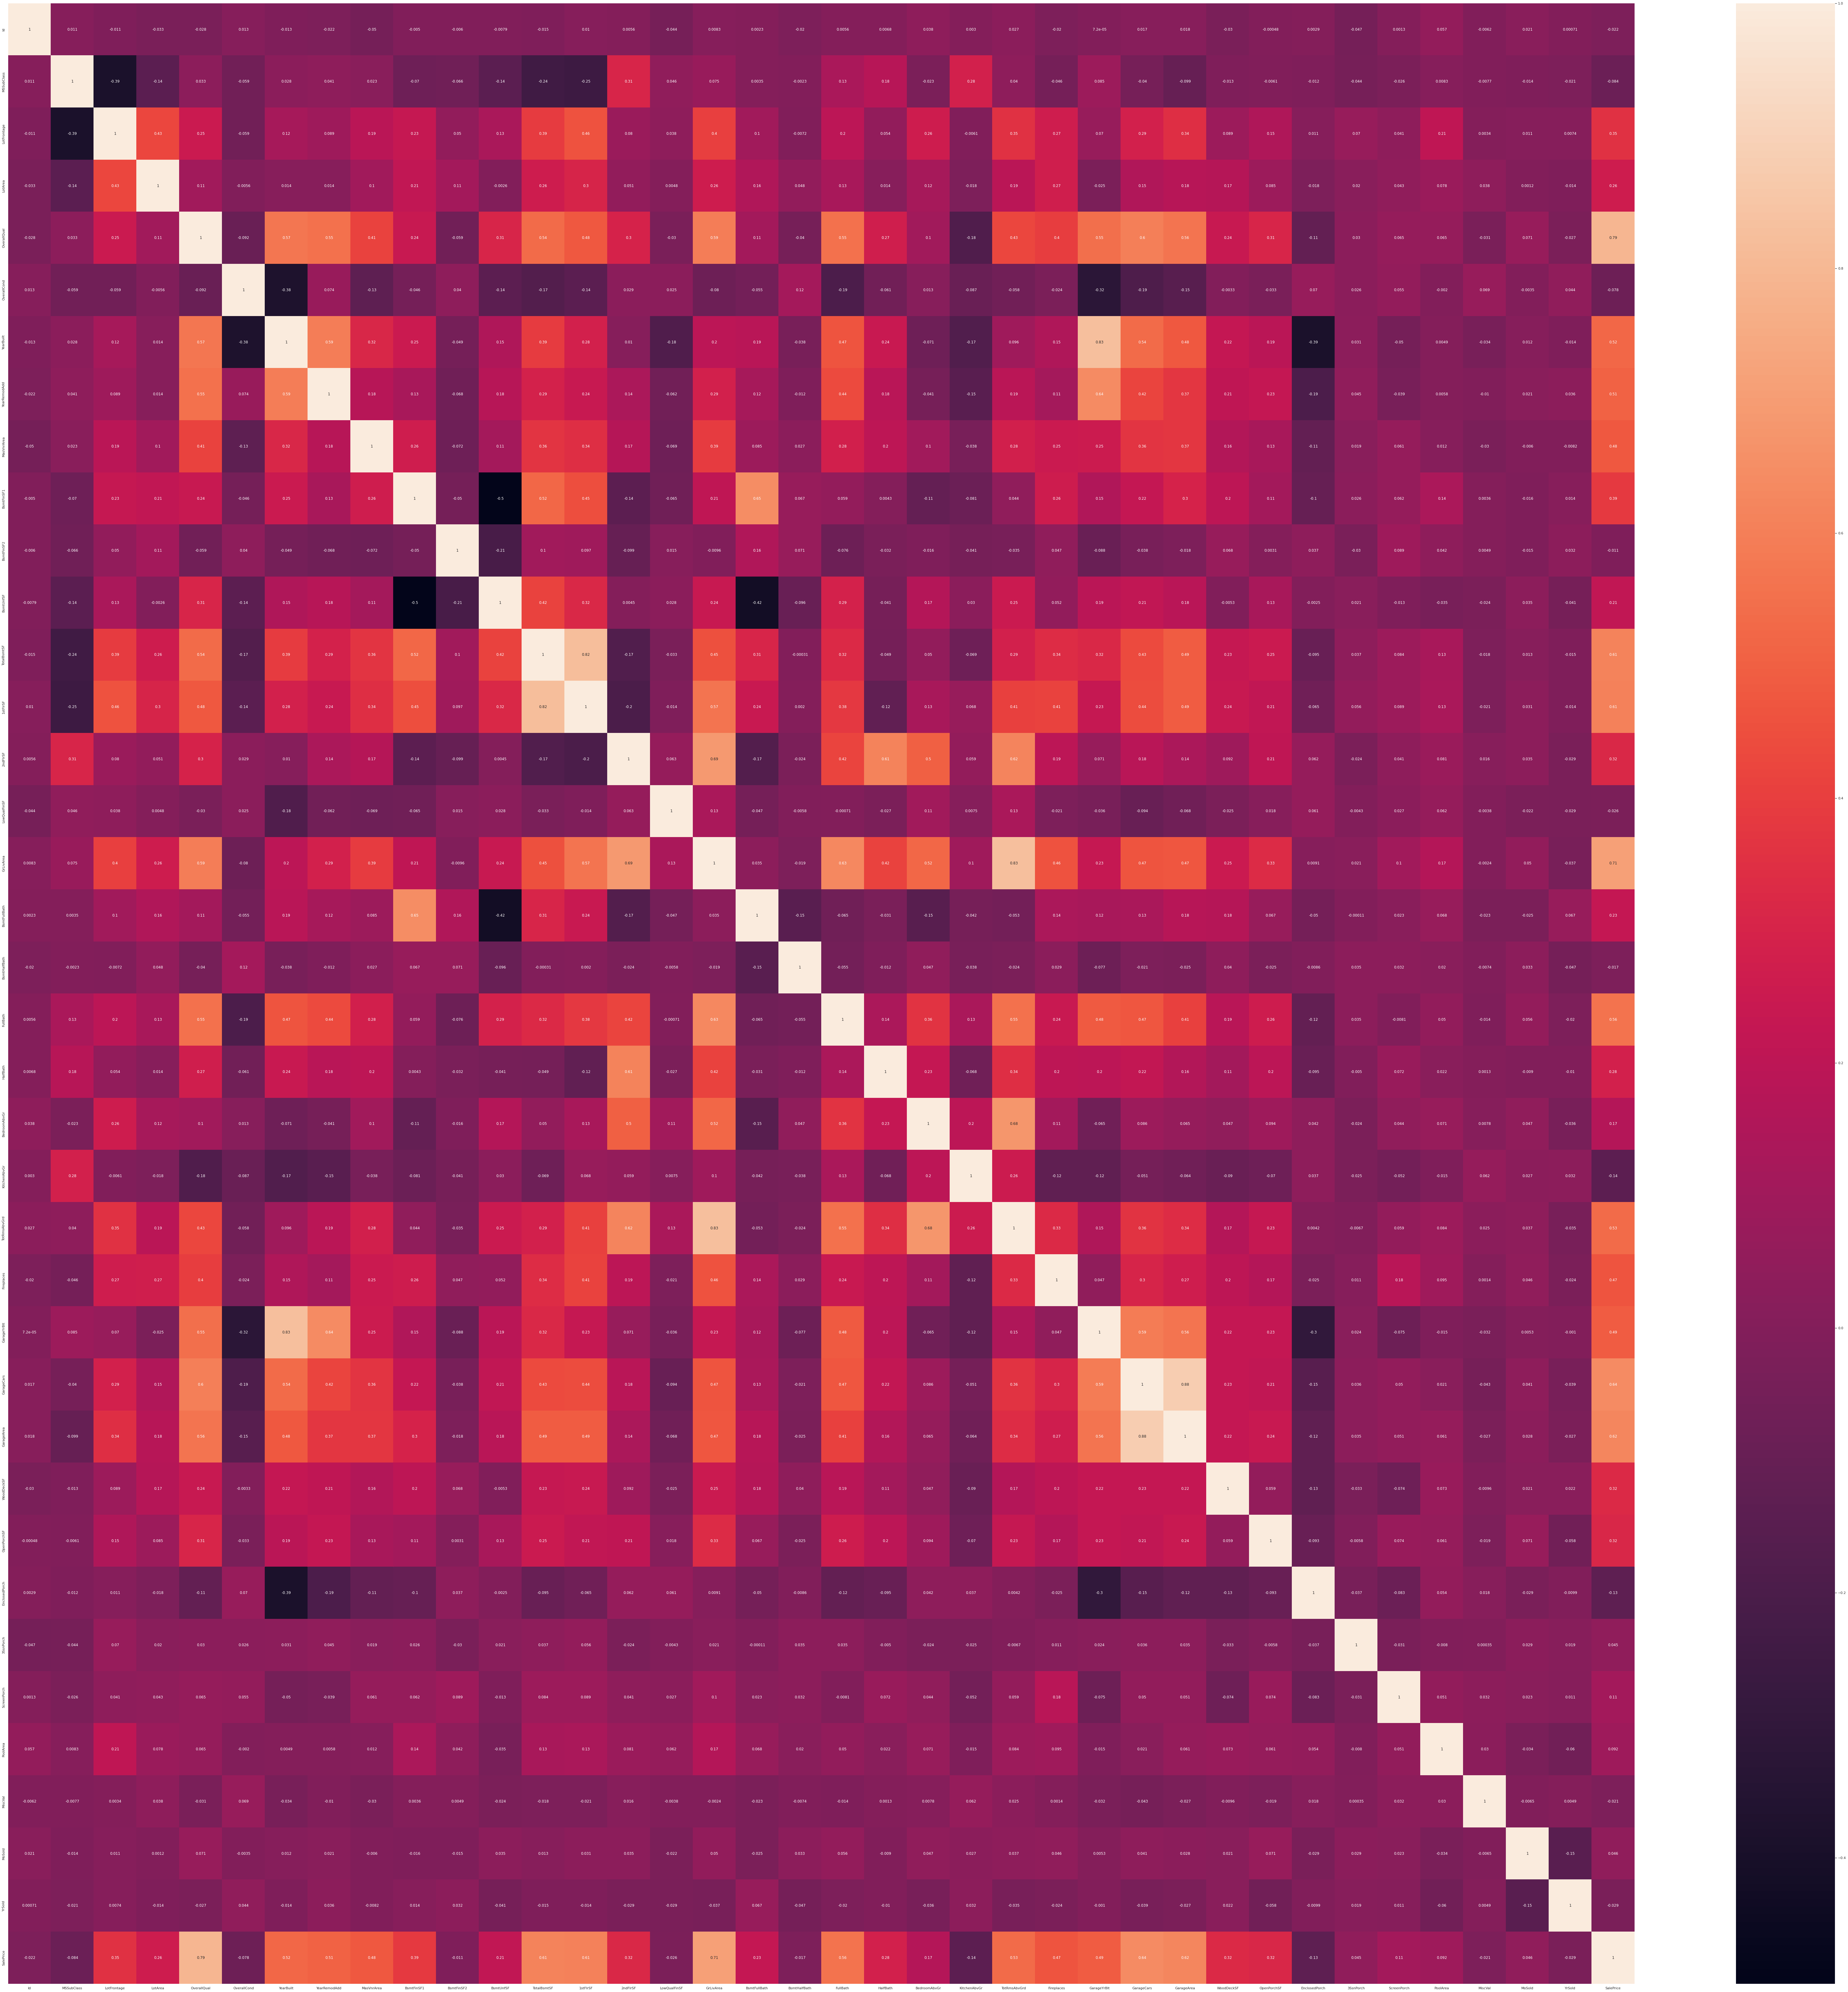

In [58]:
plt.figure(figsize=(120,120))
sns.set(font_scale=1)
sns.heatmap(df_train.corr(),annot=True)
plt.show

In [64]:
df_train['new_roof'] = df_train.RoofStyle.apply([lambda x:'Gable' if x=='Gable' else 'other'])
df_train['new_roof'].value_counts()

Gable    1141
other     319
Name: new_roof, dtype: int64

In [76]:
df_train.groupby(['new_roof','OverallCond']).SalePrice.mean()

new_roof
Gable    171483.956179
other    214676.338558
Name: SalePrice, dtype: float64

In [78]:
df_train.groupby('new_roof').SalePrice.mean()

new_roof
Gable    171483.956179
other    214676.338558
Name: SalePrice, dtype: float64